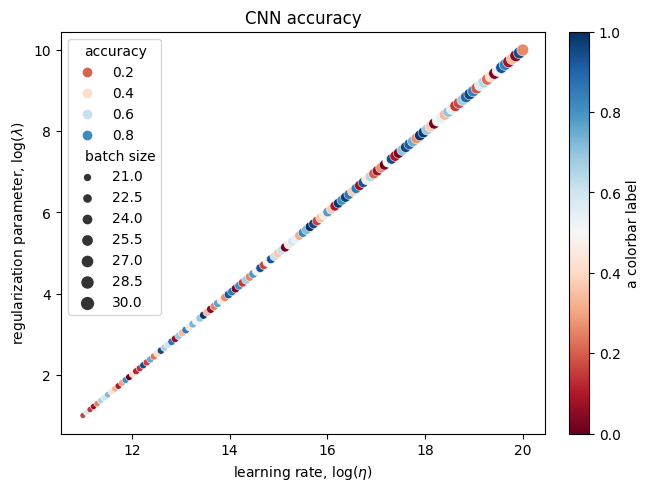

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

eta = np.linspace(11,20,125)
lmb = np.linspace(1,10,125)
batch_size = np.linspace(21,30,125)
accuracy = np.random.rand(125)

data = np.column_stack((eta, lmb, batch_size, accuracy))
df = pd.DataFrame(data, columns=["learning rate", "regularization parameter", "batch size", "accuracy"])

fig, ax = plt.subplots(layout='constrained')
ax = sns.scatterplot(
    data=df, x="learning rate", y="regularization parameter", hue="accuracy", size="batch size", palette="RdBu"
)
ax.set_title("CNN accuracy")
ax.set_xlabel(r"learning rate, $\log(\eta)$")
ax.set_ylabel(r"regularization parameter, $\log(\lambda)$")
#ax.legend(df[:,2], "batch size")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 1), cmap='RdBu'),
             ax=ax, orientation='vertical', label='a colorbar label')
#duplicate for loss